# Exercise 04 - Due Monday, October 24 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 13:09:03--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.06s  

2016-10-24 13:09:03 (77.2 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

Let's rename the file to data.csv

In [2]:
!mv abq-food-inspections-fy2010.csv data.csv

What are the headers here? Let's find out.

In [3]:
!csvcut -n data.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


Let's do some quick statistics

In [4]:
!csvstat data.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		32817:	68
		80949:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

From the csvkit, we notice that the locations are all from Albuquerque, NM. Dates of inspection are from Jan 7, 2009 to June 30, 2010. There are some null values that we can also see from above. I think, of interest, should be violation code and type of restaurants. Inspections dates are also interesting and maybe we can find trends of activity there. I would also like to look at the Nature of Business or Program Category and see if there are any trends there. We can also take out CITY and STATE since it will always be Albuquerque, NM.

There are also columns for CODES then the DESC. We do not need to keep both if they refer to the same thing. However, the csv analysis shows that Violation Code = 128 unique values, when Violation Desc = 70. There are definitley some errors here.

I will keep all information in for now until after further investigation.

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

We will now create the database model and run sqlite.

In [5]:
!csvsql --db sqlite:///data.db --insert data.csv

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
%sql sqlite:///data.db

'Connected: None@data.db'

In [8]:
%%sql
SELECT COUNT(*)
FROM data;

Done.


COUNT(*)
17556


Data row counts match, so that looks about right.

## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

What top 10 dates were the highest number of inspections done?

In [9]:
%%sql
SELECT Inspection_Date, Count (*)
    FROM data
    GROUP BY Inspection_Date
    ORDER BY Count (Inspection_Date) DESC
    LIMIT 10;

Done.


INSPECTION_DATE,Count (*)
2009-12-16,184
2009-09-10,159
2009-09-25,148
2009-11-04,133
2009-10-01,131
2009-09-15,129
2009-12-03,127
2009-07-16,126
2009-09-01,124
2009-12-09,124


Show the top 10 Nature of Business's inspected for the time period mentioned in a graph.

In [10]:
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
%%sql
SELECT Nature_of_Business, Count (*) 
    FROM data
    GROUP BY Nature_of_Business
    ORDER BY Count(Nature_of_Business) DESC
    LIMIT 20;


Done.


NATURE_OF_BUSINESS,Count (*)
RESTAURANT,4994
FOOD SERVICE,691
GROCERY,618
BAR/RESTAURANT,508
APS SCHOOL FOOD SERVICE,470
BKRY/GROC/REST,315
INST KITCHEN,272
HOTEL,254
CHILD CARE,251
APS SCHOOL FOODSERVICE,246


<Container object of 20 artists>

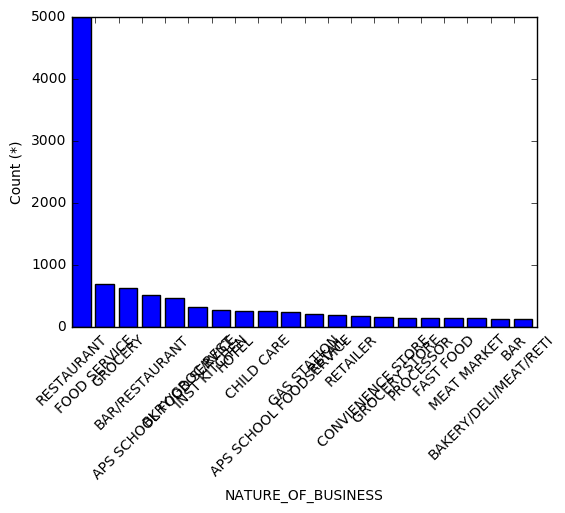

In [12]:
result = _
result.bar()

Program Category might make more sense

In [13]:
%%sql
SELECT Program_Category_Description, Count (Program_Category_Description) 
    FROM data
    GROUP BY Program_Category_Description
    ORDER BY Count(Program_Category_Description) DESC
    LIMIT 20;

Done.


PROGRAM_CATEGORY_DESCRIPTION,Count (Program_Category_Description)
Food Service Establishment,7969
Retail -Grocery,1159
Retail - Self Service & Prepackage Foods,894
Retail - Prepackage Only,865
Bar,832
School,832
Childcare,748
Mobile Pre-Packaged,515
Food Processor,489
Institutional Kitchen,357


<Container object of 20 artists>

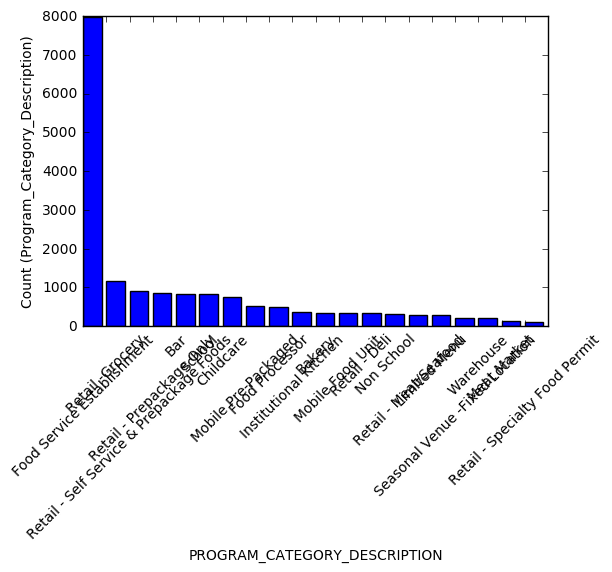

In [14]:
result = _
result.bar()

I am running the code below and I am getting "no such function error". I would run this so I can do more analysis on the dates column of the data set. I also ran this using datanotebook.org and getting the same error message.

In [16]:
%%sql
SELECT TO_CHAR(Inspection_Date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(Inspection_Date, 'YYYY') AS year,
    TO_CHAR(Inspection_Date, 'MM') AS month,
    TO_CHAR(Inspection_Date, 'DD') AS day
    FROM data
    LIMIT 5;

(sqlite3.OperationalError) no such function: TO_CHAR [SQL: "SELECT TO_CHAR(Inspection_Date, 'YYYY-MM-DD') AS day_of_year, \n    TO_CHAR(Inspection_Date, 'YYYY') AS year,\n    TO_CHAR(Inspection_Date, 'MM') AS month,\n    TO_CHAR(Inspection_Date, 'DD') AS day\n    FROM data\n    LIMIT 5;"]


## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table